Enter frequency of sinusoidal waveform: 50


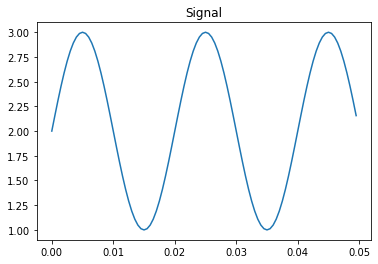

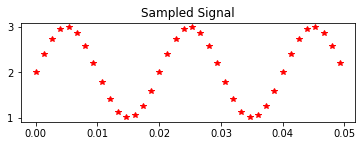

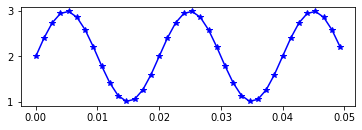

Enter no.of quantization levels: 8
Quantization Levels: [1.         1.28571429 1.57142857 1.85714286 2.14285714 2.42857143
 2.71428571 3.        ]


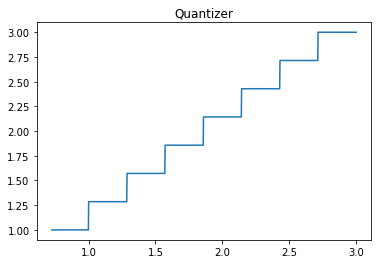

Enter no.of quantization levels: 32


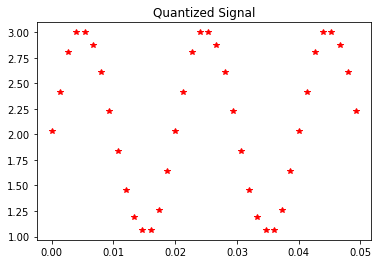

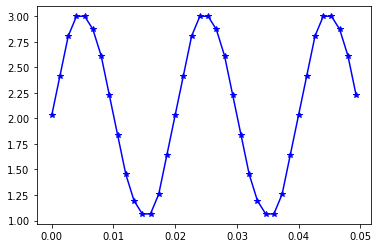

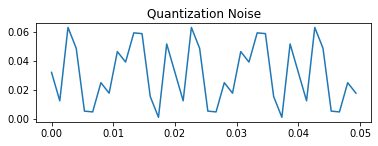

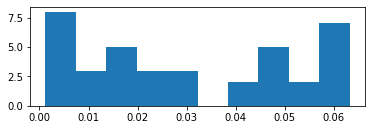

Quantization Levels Mapping: {1.0: 0, 1.064516129032258: 1, 1.129032258064516: 2, 1.1935483870967742: 3, 1.2580645161290323: 4, 1.3225806451612903: 5, 1.3870967741935485: 6, 1.4516129032258065: 7, 1.5161290322580645: 8, 1.5806451612903225: 9, 1.6451612903225805: 10, 1.7096774193548387: 11, 1.7741935483870968: 12, 1.8387096774193548: 13, 1.903225806451613: 14, 1.967741935483871: 15, 2.032258064516129: 16, 2.096774193548387: 17, 2.161290322580645: 18, 2.225806451612903: 19, 2.290322580645161: 20, 2.354838709677419: 21, 2.4193548387096775: 22, 2.4838709677419355: 23, 2.5483870967741935: 24, 2.6129032258064515: 25, 2.6774193548387095: 26, 2.741935483870968: 27, 2.806451612903226: 28, 2.870967741935484: 29, 2.935483870967742: 30, 3.0: 31}

Binary Code: {0: '00000', 1: '00001', 2: '00010', 3: '00011', 4: '00100', 5: '00101', 6: '00110', 7: '00111', 8: '01000', 9: '01001', 10: '01010', 11: '01011', 12: '01100', 13: '01101', 14: '01110', 15: '01111', 16: '10000', 17: '10001', 18: '10010', 19: 

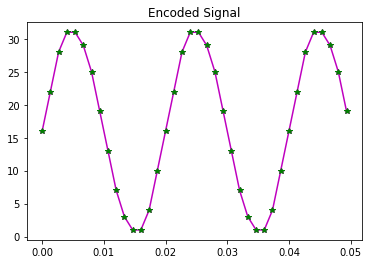

Binary Coded Signal: ['10000', '10110', '11100', '11111', '11111', '11101', '11001', '10011', '01101', '00111', '00011', '00001', '00001', '00100', '01010', '10000', '10110', '11100', '11111', '11111', '11101', '11001', '10011', '01101', '00111', '00011', '00001', '00001', '00100', '01010', '10000', '10110', '11100', '11111', '11111', '11101', '11001', '10011']
Signal-to-Noise ratio in dB:  71.06771604375368
Signal-to-Noise ratio in dB by using equation:  47.61854160138544


Text(0.5, 1.0, 'SNR vs No.of bits per symbol')

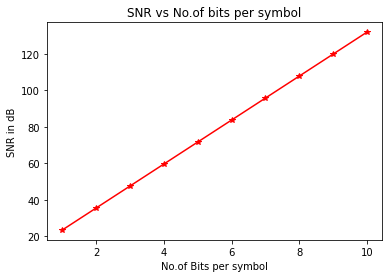

In [1]:
import numpy as np
import matplotlib.pyplot as plt
time = np.arange(0,0.05,0.0005) 
frequency_message=int(input("Enter frequency of sinusoidal waveform: "))
dc_offset = 2 
signal = np.sin(2*np.pi*frequency_message*time) + dc_offset
plt.plot(time,signal)
plt.title("Signal")
plt.show()
#sampling
#f_s = int(input("Enter Sampling Frequency:"))
frequency_sample = 15*frequency_message
sampling_time = np.arange(0,0.05,1/frequency_sample)
sampled_signal = dc_offset + np.sin(2*np.pi*frequency_message*sampling_time)
plt.subplot(2,1,1)
plt.plot(sampling_time,sampled_signal,"r*") 
plt.title("Sampled Signal")
plt.show()
plt.subplot(2,1,2)
plt.plot(sampling_time,sampled_signal,"b*-")
plt.show() 

# Uniform Quantizer
L = int(input("Enter no.of quantization levels: "))
signal_min = round(min(signal))
signal_max = round(max(signal))
Quantization_levels = np.linspace(signal_min,signal_max,L)
print("Quantization Levels:",Quantization_levels)
q_level=[]

for i in np.linspace(0.725,3,1000):
   for j in Quantization_levels:
       if i <= j:
           q_level.append(j)
           break
plt.plot(np.linspace(0.725,3,1000),q_level)
plt.title("Quantizer")
plt.show()
#Quantization for varying L
L = int(input("Enter no.of quantization levels: "))
signal_min = round(min(signal))
signal_max = round(max(signal))
Quantization_levels= np.linspace(signal_min,signal_max,L) 
quantized_signal = []
for i in sampled_signal:
    for j in Quantization_levels:
        if i <= j:
             quantized_signal.append(j)
             break
             plt.subplot(1,1,1)
plt.plot(sampling_time,quantized_signal,"r*")
plt.title("Quantized Signal")
plt.show() 
plt.subplot(1,1,1)
plt.plot(sampling_time,quantized_signal,"b*-")
plt.show() 
#quantization noise
quantization_noise = quantized_signal-sampled_signal
plt.subplot(2,1,1)
plt.plot(sampling_time,quantization_noise)
plt.title("Quantization Noise")
plt.show() 
plt.subplot(2,1,2)
plt.hist(quantization_noise)
plt.show() 

#Quantization Levels Mapping to decimal
count = 0
quantization_levels_mapping = {}
for i in Quantization_levels:
    quantization_levels_mapping[i] = quantization_levels_mapping.get(i,
count)
    count+=1

# Decimal to binary bits
binary_code ={}
bit_no = int(np.log2(L))
for i in range(L):
    val = bin(i).replace("0b", "")
    if len(val) < bit_no:
        f_bit =""
        for j in range(bit_no-len(val)):
            f_bit += "0"
        val = f_bit + val
    binary_code[i] = binary_code.get(i,val)

print("Quantization Levels Mapping:",quantization_levels_mapping) 
print("\nBinary Code:",binary_code) 

# encoded signal
encoded_signal=[]
for k in quantized_signal:
    encoded_signal.append(quantization_levels_mapping[k]) 
plt.plot(sampling_time, encoded_signal, "m*-",sampling_time, encoded_signal, "g*")
plt.title("Encoded Signal")
plt.show() 
# Binary Coding
binary_coded_signal = []
for k in encoded_signal:
    binary_coded_signal.append(binary_code[k])
print("Binary Coded Signal:", binary_coded_signal)


#SNR
def power(s):
 p = 0
 for i in s:
     p += i**2
 P = p/len(s)
 return P

p_signal = power(signal)
p_noise = power(quantization_noise) 
snr = p_signal/p_noise
snr_db = 20*np.log10(snr)
print("Signal-to-Noise ratio in dB: ", snr_db) 

# SNR by equation 
# R = int(np.log2(L)) no.of Bits per sample 
s_min = round(min(signal))
s_max = round(max(signal))
L = 8
step_size = (s_max-s_min)/L
power_noise = (step_size**2)/3
power_signal = power(signal)
snr = power_signal/power_noise 
snr_db = 20*np.log10(snr)
print("Signal-to-Noise ratio in dB by using equation: ", snr_db)


#snr vs no of bits
def power(s):
    p = 0
    for i in s:
        p += i**2
    P = p/len(s)
    return P
time = np.arange(0,0.05,0.0005) #Time 
signal = np.sin(2*np.pi*frequency_message*time) + 2 
s_min = round(min(signal))
s_max = round(max(signal))
power_signal = power(signal)
snr_db=[]
for i in range(1,11):
    R = i
    L = 2**R
    step_size = (s_max-s_min)/L
    power_noise = (step_size**2)/3
    snr = power_signal/power_noise 
    snr_db.append(20*np.log10(snr))
plt.plot(range(1,11),snr_db,"r*-")
plt.xlabel("No.of Bits per symbol") 
plt.ylabel("SNR in dB")
plt.title("SNR vs No.of bits per symbol") 